In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import normal
from scipy.optimize import curve_fit
import re

In [5]:
log_file = '/home/flipvanrijn/Workspace/Dedicon-Thesis/networks/fast-rcnn/experiments/logs/imagenet_vgg_cnn_m_1024.txt.2015-08-06_12-06-18'
with open(log_file) as f_log:
    losses = []
    for line in f_log:
        m = re.search('Iteration (\d+), loss = (\d+\.\d+)$', line)
        if m:
            losses.append(float(m.group(2)))

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: overflow encountered in power


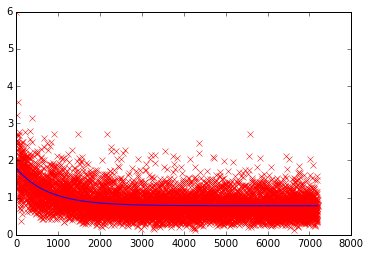

In [22]:
x_data = range(len(losses))
y_data = losses

def func(x, a, b, c, d):
    return (a*b)**x+c

parameter, covariance_matrix = curve_fit(func, x_data, y_data)

x = np.linspace(min(x_data), max(x_data), 1000)
plt.plot(x_data, y_data, 'rx', label='data')
plt.plot(x, func(x, *parameter), 'b-', label='fit')   # the star is to unpack the parameter array
plt.show()